In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import statsmodels.api as sm

In [2]:
from py_helper_functions import *

In [3]:
# import data which is already filtered using the 01_filter_data.ipynb file
df = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Data-Analysis-2/main/data/loan_data.csv')

# import political affiliation of states data
df_states = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Data-Analysis-2/main/data/state_affiliation.csv',sep=';',header=None)

In [4]:
df_states.head()

,0,1,2
0,Alabama,R,41389
1,Alaska,I,74422
2,Arizona,R,44161
3,Arkansas,R,39580
4,California,D,70662


In [5]:
# correct mistake in csv (drop empty column)
df_states.dropna(inplace=True,axis=1)

# rename columns
df_states.columns = ['geo_name','affiliation','gdp_per_capita']

# merge dataframes
df = df.merge(df_states,on='geo_name')

---
# 00. EDA
--- 

In [6]:
df.head()

,geo_name,geo_level,race_or_ethnicity,gender,veteran,number_of_loans,loan_amount,quartiles_number_of_loans,quartiles_loan_amount,percentile_number_of_loans,percentile_loan_amount,pct_black_alone,affiliation,gdp_per_capita
0,Montana,state,Hispanic,Female Owned,Veteran,8,376256,Bottom 25% of geographies,26-50% of geographies,22,30,0.6,D,44145
1,Montana,state,Hispanic,Female Owned,Non-Veteran,96,2776646,Bottom 25% of geographies,Bottom 25% of geographies,12,10,0.6,D,44145
2,Montana,state,White,Female Owned,Non-Veteran,2546,97370815,26-50% of geographies,Bottom 25% of geographies,30,22,0.6,D,44145
3,Montana,state,White,Female Owned,Veteran,116,3037589,26-50% of geographies,Bottom 25% of geographies,28,18,0.6,D,44145
4,Montana,state,Asian,Female Owned,Veteran,1,95000,Bottom 25% of geographies,Bottom 25% of geographies,0,19,0.6,D,44145


In [7]:
print(f"I have {df.shape[0]} rows and {df.shape[1]} columns in my dataset.")

I have 807 rows and 14 columns in my dataset.


In [8]:
# look at columns
df.columns

Index(['geo_name', 'geo_level', 'race_or_ethnicity', 'gender', 'veteran',
       'number_of_loans', 'loan_amount', 'quartiles_number_of_loans',
       'quartiles_loan_amount', 'percentile_number_of_loans',
       'percentile_loan_amount', 'pct_black_alone', 'affiliation',
       'gdp_per_capita'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   geo_name                    807 non-null    object 
 1   geo_level                   807 non-null    object 
 2   race_or_ethnicity           807 non-null    object 
 3   gender                      807 non-null    object 
 4   veteran                     807 non-null    object 
 5   number_of_loans             807 non-null    int64  
 6   loan_amount                 807 non-null    int64  
 7   quartiles_number_of_loans   807 non-null    object 
 8   quartiles_loan_amount       807 non-null    object 
 9   percentile_number_of_loans  807 non-null    int64  
 10  percentile_loan_amount      807 non-null    int64  
 11  pct_black_alone             807 non-null    float64
 12  affiliation                 807 non-null    object 
 13  gdp_per_capita              807 non

In [104]:
# look at value counts for each column
for col in df.columns:
    print(df[col].value_counts())
    print('-------------------')

Montana                 16
North Carolina          16
Kentucky                16
South Carolina          16
New Mexico              16
Hawaii                  16
Colorado                16
Florida                 16
New Jersey              16
Alabama                 16
Georgia                 16
California              16
Washington              16
Pennsylvania            16
Massachusetts           16
New York                16
Ohio                    16
Oregon                  16
Mississippi             16
Illinois                16
West Virginia           16
Indiana                 16
Arkansas                16
Arizona                 16
Tennessee               16
Nevada                  16
South Dakota            16
Nebraska                16
Louisiana               16
Kansas                  16
Connecticut             16
Idaho                   16
Michigan                16
Virginia                16
Utah                    16
Maryland                16
District of Columbia    16
T

In [11]:
# look at the unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

geo_name 51
geo_level 1
race_or_ethnicity 4
gender 2
veteran 2
number_of_loans 577
loan_amount 807
quartiles_number_of_loans 4
quartiles_loan_amount 4
percentile_number_of_loans 90
percentile_loan_amount 91
pct_black_alone 49
affiliation 3
gdp_per_capita 51


In [12]:
# look at null values
df.isnull().sum()

geo_name                      0
geo_level                     0
race_or_ethnicity             0
gender                        0
veteran                       0
number_of_loans               0
loan_amount                   0
quartiles_number_of_loans     0
quartiles_loan_amount         0
percentile_number_of_loans    0
percentile_loan_amount        0
pct_black_alone               0
affiliation                   0
gdp_per_capita                0
dtype: int64

In [13]:
df.describe()

,number_of_loans,loan_amount,percentile_number_of_loans,percentile_loan_amount,pct_black_alone,gdp_per_capita
count,807.000000,8.070000e+02,807.000000,807.000000,807.000000,807.000000
mean,3014.047088,1.625656e+08,49.784387,50.000000,11.270012,56750.661710
std,7259.171822,5.263416e+08,29.641708,29.477333,10.408518,20064.099992
min,1.000000,3.010000e+02,0.000000,0.000000,0.600000,35015.000000
25%,53.500000,1.992810e+06,24.000000,24.000000,3.400000,47128.000000
50%,339.000000,1.562447e+07,50.000000,50.000000,7.300000,52664.000000
75%,1949.500000,9.952855e+07,76.000000,76.000000,15.200000,61713.000000
max,73256.000000,8.835301e+09,100.000000,100.000000,44.700000,178442.000000


## Look at loan amount as our dependant variable

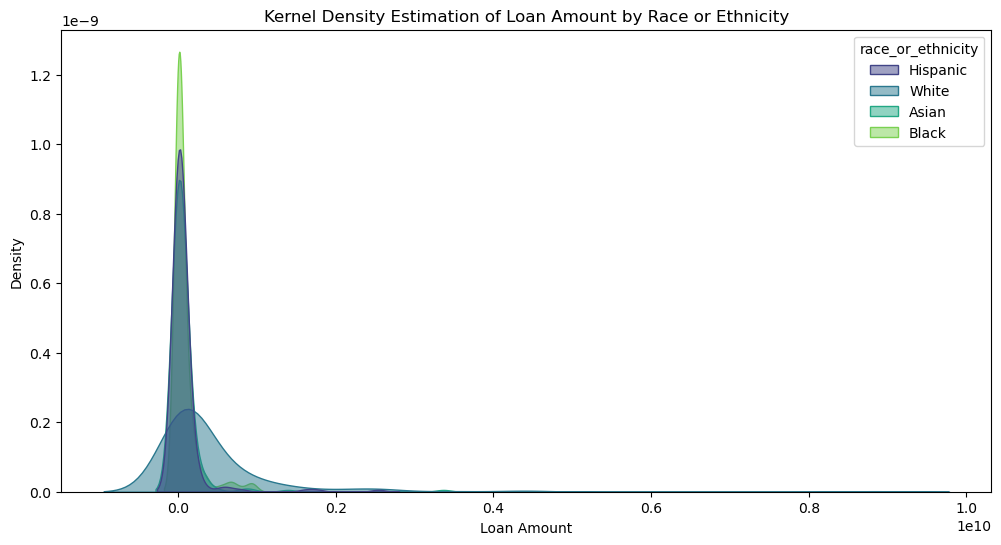

In [14]:
# Setting up the size of figure
plt.figure(figsize=(12, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='loan_amount', hue='race_or_ethnicity', 
            palette='viridis',  # color palette
            fill=True,  # fill the area under the curve
            alpha=0.5)  # transparency

# Set labels and title
plt.xlabel('Loan Amount')
plt.title('Kernel Density Estimation of Loan Amount by Race or Ethnicity')

# Show the plot
plt.show()

In [15]:
# Log transform the loan_amount column
df['ln_loan_amount'] = df['loan_amount'].apply(lambda x: np.log(x))

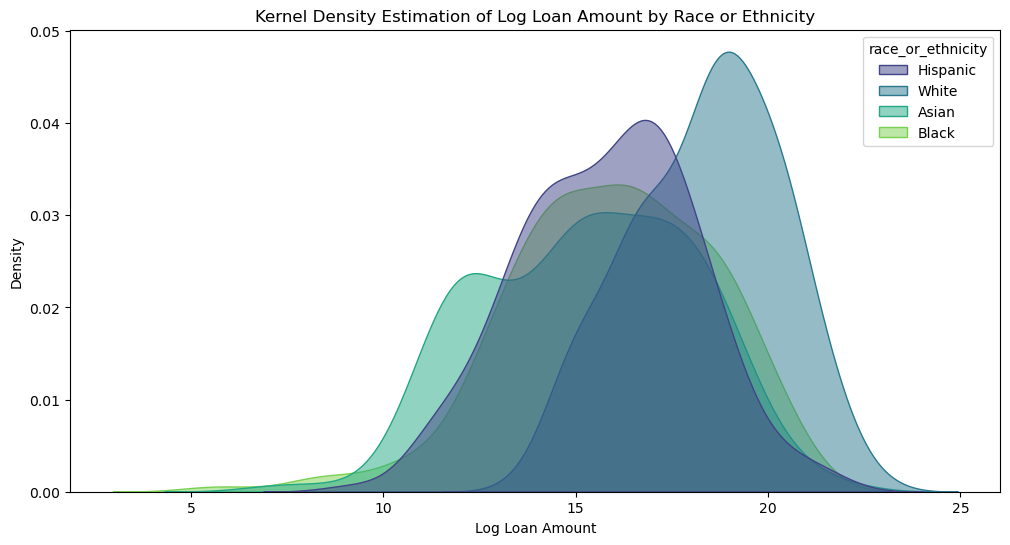

In [16]:
# Setting up the figure
plt.figure(figsize=(12, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='ln_loan_amount', hue='race_or_ethnicity', 
            palette='viridis',  # color palette
            fill=True,  # fill the area under the curve
            alpha=0.5)  # transparency

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.title('Kernel Density Estimation of Log Loan Amount by Race or Ethnicity')

# Show the plot
plt.show()

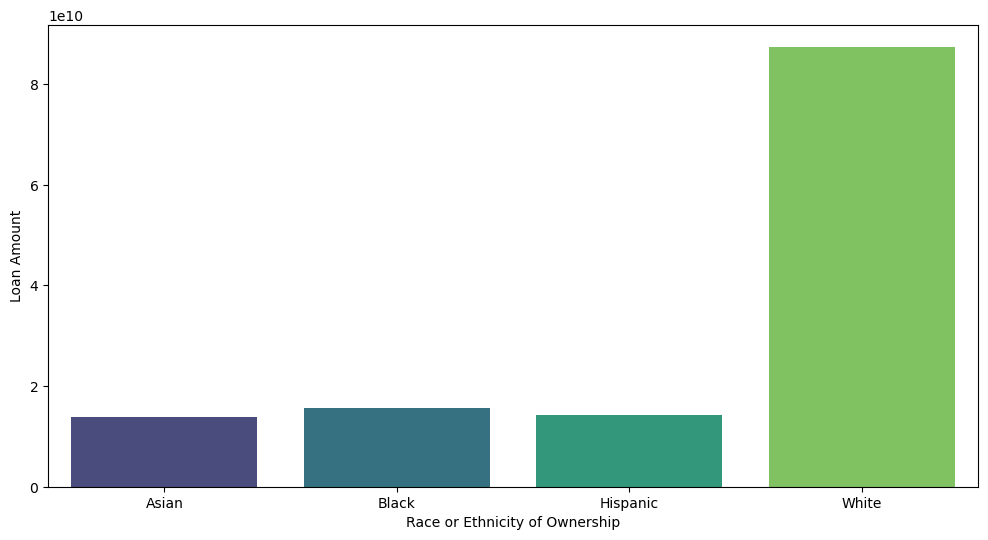

In [105]:
# create a dataframe with the log loan amount grouped by ehnicity
by_ethnicity = df.groupby(by='race_or_ethnicity').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_ethnicity,x='race_or_ethnicity',y=('loan_amount','sum'), # multiindex header
            palette='viridis')

plt.xlabel('Race or Ethnicity of Ownership')
plt.ylabel('Loan Amount')

plt.show()

## Look at controlling variables

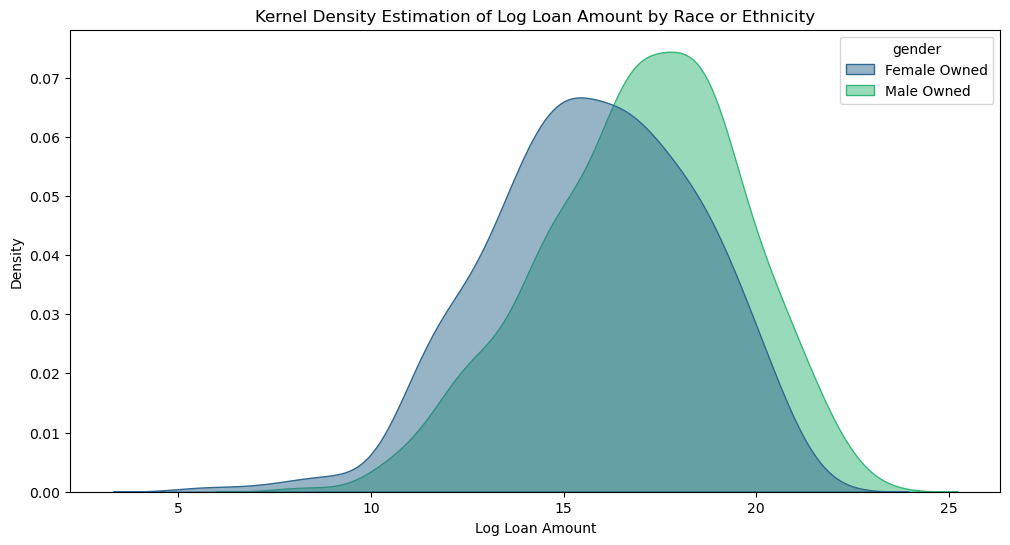

In [18]:
# Setting up the figure
plt.figure(figsize=(12, 6))

# Create the KDE plot
sns.kdeplot(data=df, x='ln_loan_amount', hue='gender',
            palette='viridis',  # Color palette
            fill=True,  # Fill the area under the curve
            alpha=0.5)  # transparency

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.title('Kernel Density Estimation of Log Loan Amount by Race or Ethnicity')

# Show the plot
plt.show()

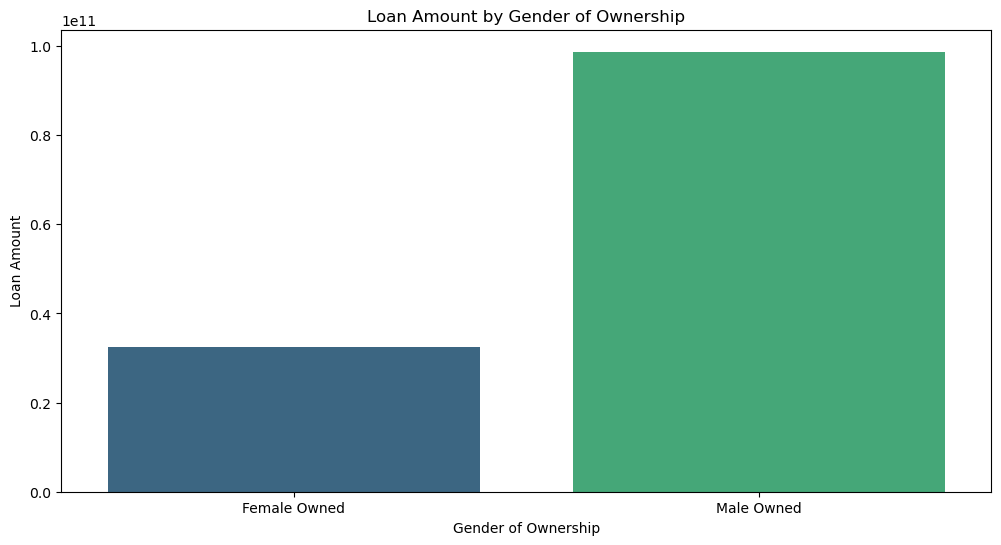

In [19]:
# create a DataFrame with the loan amount grouped by gender
by_gender = df.groupby(by='gender').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_gender, x='gender', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Gender of Ownership')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Gender of Ownership')

plt.show()

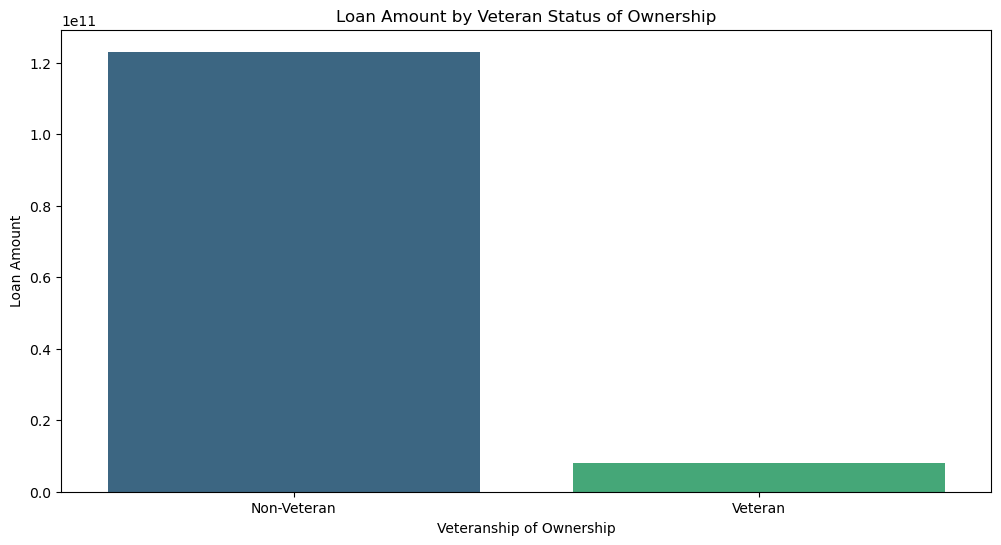

In [20]:
# create a DataFrame with the loan amount grouped by veteran status
by_veteranship = df.groupby(by='veteran').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_veteranship, x='veteran', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Veteranship of Ownership')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Veteran Status of Ownership')

plt.show()

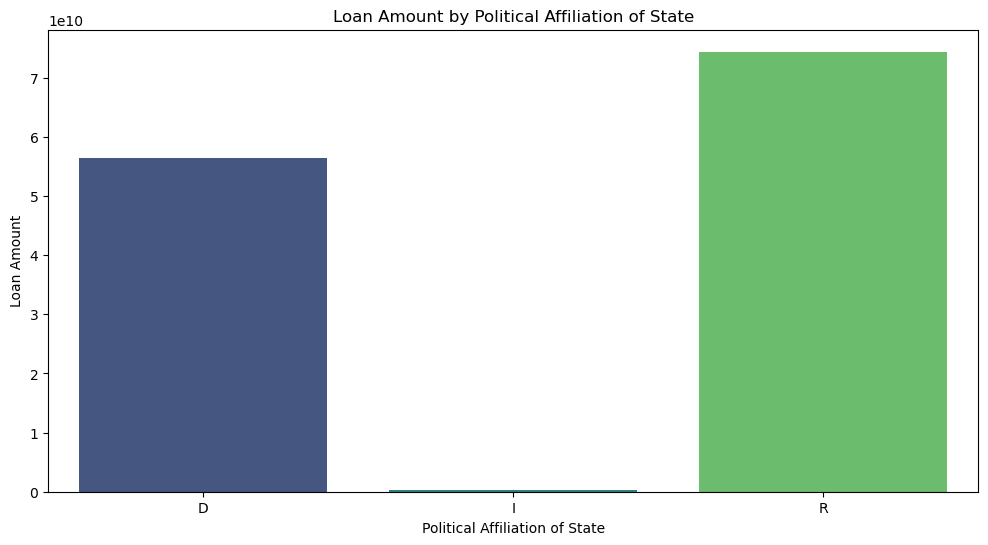

In [21]:
# create a DataFrame with the loan amount grouped by political affiliation of state
by_affiliation = df.groupby(by='affiliation').aggregate({'loan_amount': ['sum']}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=by_affiliation, x='affiliation', y=('loan_amount', 'sum'), palette='viridis')

plt.xlabel('Political Affiliation of State')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Political Affiliation of State')

plt.show()

C:\Users\Peti\AppData\Local\Temp\ipykernel_20056\1856510643.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


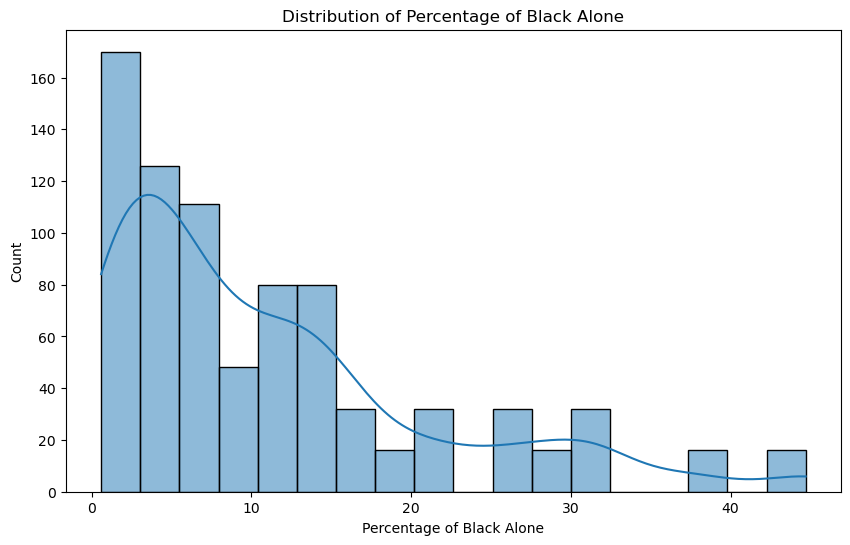

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pct_black_alone', kde=True,palette='viridis')
plt.xlabel('Percentage of Black Alone')
plt.ylabel('Count')
plt.title('Distribution of Percentage of Black Alone')
plt.show()

# Create Dummy Variables

In [25]:
# creating dummy variables
# for white owned businesses
df['white_owned'] = df['race_or_ethnicity'].apply(lambda x: 1 if x == 'White' else 0)

# for male owned businesses
df['male_owned'] = df['gender'].apply(lambda x: 1 if x == 'Male Owned' else 0)

# for Non-Veteran owned businesses
df['nonveteran_owned'] = df['veteran'].apply(lambda x: 1 if x == 'Non-Veteran' else 0)

# for Republican states
df['republican'] = df['affiliation'].apply(lambda x: 1 if x == 'R' else 0)

# for ln number of loans
df['ln_number_of_loans'] = df['number_of_loans'].apply(lambda x: np.log(x))

C:\Users\Peti\AppData\Local\Temp\ipykernel_20056\1727779947.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


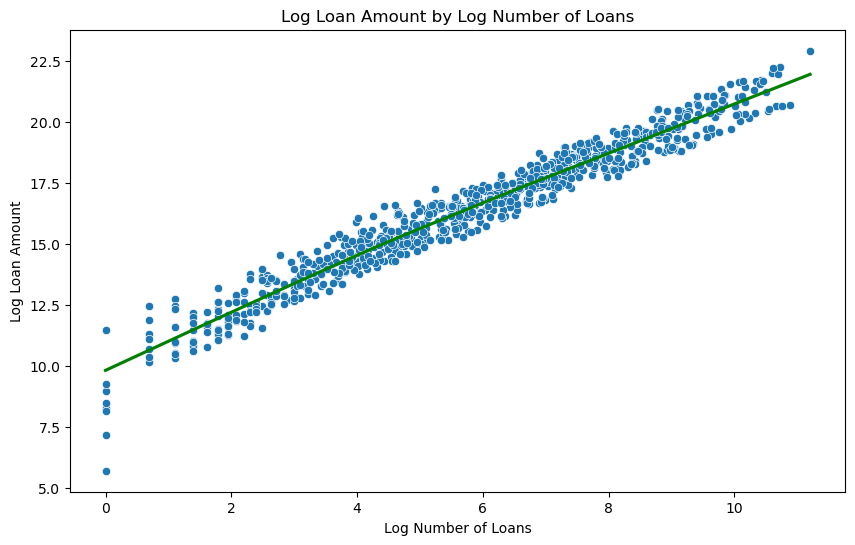

In [34]:
# check if number of loans is a good control
# check for potential splines
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='ln_number_of_loans', y='ln_loan_amount', palette='viridis')
sns.regplot(data=df, x='ln_number_of_loans', y='ln_loan_amount', lowess=True, scatter=False, color='green')

plt.xlabel('Log Number of Loans')
plt.ylabel('Log Loan Amount')
plt.title('Log Loan Amount by Log Number of Loans')


plt.show()

I will leave this out of my model, as they are in perfect collinearity.

In [38]:
df[['loan_amount','ln_loan_amount','white_owned','male_owned','nonveteran_owned','republican','pct_black_alone']].describe()

,loan_amount,ln_loan_amount,white_owned,male_owned,nonveteran_owned,republican,pct_black_alone
count,8.070000e+02,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,1.625656e+08,16.364816,0.252788,0.501859,0.505576,0.624535,11.270012
std,5.263416e+08,2.696700,0.434880,0.500307,0.500279,0.484543,10.408518
min,3.010000e+02,5.707110,0.000000,0.000000,0.000000,0.000000,0.600000
25%,1.992810e+06,14.505031,0.000000,0.000000,0.000000,0.000000,3.400000
50%,1.562447e+07,16.564349,0.000000,1.000000,1.000000,1.000000,7.300000
75%,9.952855e+07,18.415929,1.000000,1.000000,1.000000,1.000000,15.200000
max,8.835301e+09,22.902021,1.000000,1.000000,1.000000,1.000000,44.700000


In [103]:
# Create Descriptive Table of binary variables to later inlcude in the documentation
# look at binary variables
series1 = df['white_owned'].value_counts()
series2 = df['male_owned'].value_counts()
series3 = df['nonveteran_owned'].value_counts()
series4 = df['republican'].value_counts()

#create DataFrame
value_counts_table = pd.DataFrame({'White Owned': series1, 'Male Owned': series2, 'Non-Veteran Owned': series3, 'Republican': series4})
value_counts_table.index = ['No', 'Yes'] # rename index

# add new row
value_counts_table.loc['Percentage of Total'] = value_counts_table.loc["Yes"]/(value_counts_table.sum())
value_counts_table.loc['Percentage of Total'] = value_counts_table.loc['Percentage of Total'].apply(lambda x: "{:.2%}".format(x))
value_counts_table.round(2)

,White Owned,Male Owned,Non-Veteran Owned,Republican
No,603.0,402.0,399.0,303.0
Yes,204.0,405.0,408.0,504.0
Percentage of Total,25.28%,50.19%,50.56%,62.45%


---
# Regression Models
--- 

In [ ]:
# start with simple level-level regression
reg1 = smf.ols('loan_amount ~ white_owned', data=df).fit()
stargazer1 = Stargazer([reg1])
stargazer1

In [ ]:
# log might capture the relationship better
reg2 = smf.ols('ln_loan_amount ~ white_owned', data=df).fit()
stargazer2 = Stargazer([reg2])
stargazer2

R-squared is higher so it's best to use log-level regression

In [ ]:
# add binary controlling variables
reg3 = smf.ols('ln_loan_amount ~ white_owned + male_owned',data=df).fit()
reg4 = smf.ols('ln_loan_amount ~ white_owned + male_owned + nonveteran_owned',data=df).fit()
reg5 = smf.ols('ln_loan_amount ~ white_owned + male_owned + nonveteran_owned + republican', data=df).fit()
stargazer3 = Stargazer([reg3,reg4,reg5])
stargazer3

In [ ]:
# add black population percentage of state as a control
reg6 = smf.ols("ln_loan_amount ~ white_owned + male_owned + nonveteran_owned + republican + pct_black_alone", data=df).fit(cov_type="HC1")
stargazer4 = Stargazer([reg3,reg4,reg5,reg6])
stargazer4

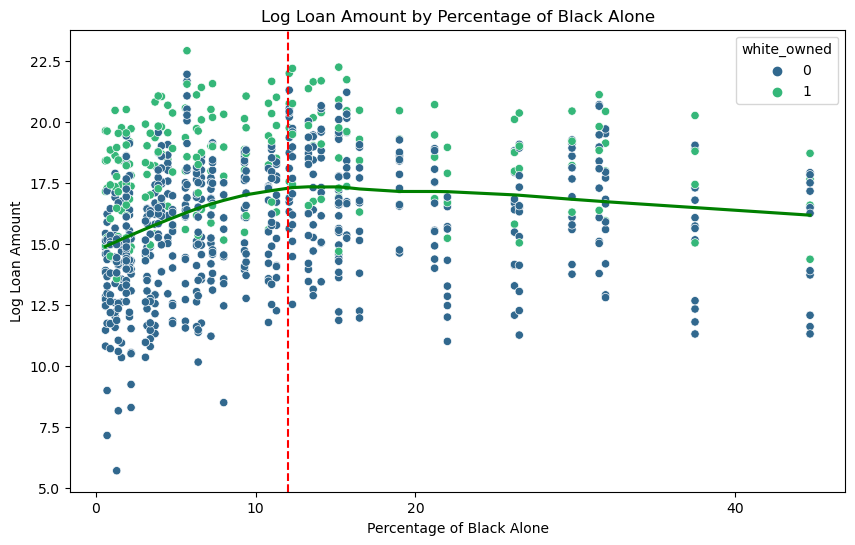

In [65]:
# check if percentage of black alone is a good control
# check for potential splines
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='pct_black_alone', y='ln_loan_amount', hue='white_owned',# show also which ones are white owned
                 palette='viridis')
sns.regplot(data=df, x='pct_black_alone', y='ln_loan_amount', lowess=True, scatter=False, color='green')

plt.xlabel('Percentage of Black Alone')
plt.ylabel('Log Loan Amount')
plt.title('Log Loan Amount by Percentage of Black Alone')

plt.xticks([0, 10, 20, 40])

# Add vertical line at x=14
plt.axvline(x=12, color='red', linestyle='--')

plt.show()

In [ ]:
# add piecewise lienar spline with knot at 12% black alone
reg7 = smf.ols("ln_loan_amount ~ white_owned + male_owned + nonveteran_owned + republican + lspline(pct_black_alone, [12])", data=df).fit(cov_type="HC1")
stargazer5 = Stargazer([reg3,reg4,reg5,reg6,reg7])
stargazer5

In [30]:
# check for interactions
reg8 = smf.ols("ln_loan_amount ~ white_owned + male_owned + nonveteran_owned + republican + white_owned * male_owned + lspline(pct_black_alone, [12])", data=df).fit(cov_type="HC1")
stargazer6 = Stargazer([reg8])
stargazer6
